# ArcheD correlation analysis

In [24]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics 


In [2]:
x = '20_10_22'

In [3]:
#Model
hist=np.load(x+'/abeta_history_'+x+'.npy',allow_pickle='TRUE').item()
stat=np.load(x+'/abeta_stat_'+x+'.npy',allow_pickle='TRUE')
prediction_test = np.load(x+'/abeta_prediction_'+x+'.npy',allow_pickle='TRUE')
prediction_train = np.load(x+'/abeta_train_prediction_'+x+'.npy',allow_pickle='TRUE')
prediction_all = np.load(x+'/abeta_all_prediction_'+x+'.npy',allow_pickle='TRUE')
test_label = np.load(x+'/abeta_testlab_'+x+'.npy',allow_pickle='TRUE')

info = pd.read_csv(x+'/abeta_info_improved_'+x+'.csv')




In [4]:
#BEST Model
stat_best=np.load(x+'/abeta_stat_best_'+x+'.npy',allow_pickle='TRUE')
prediction_test_best = np.load(x+'/abeta_prediction_best_'+x+'.npy',allow_pickle='TRUE')
prediction_train_best = np.load(x+'/abeta_train_prediction_best_'+x+'.npy',allow_pickle='TRUE')
prediction_all_best = np.load(x+'/abeta_all_prediction_best_'+x+'.npy',allow_pickle='TRUE')
#dense_best = np.load(x+'/abeta_dense_out_best_'+x+'.npy',allow_pickle='TRUE')
#dense_all_best = np.load(x+'/abeta_dense_all_out_best_'+x+'.npy',allow_pickle='TRUE')



In [6]:
#SUVR
av45 = pd.read_csv('/csc/epitkane/home/atagmazi/AD_DL_ADNI/PET_Image_Analysis/UCBERKELEYAV45_11_16_21.csv')
fbb = pd.read_csv('/csc/epitkane/home/atagmazi/AD_DL_ADNI/PET_Image_Analysis/UCBERKELEYFBB_11_16_21.csv')

suvr = pd.concat([av45, fbb], axis=0)

In [7]:
#memory test
mem = pd.read_csv('/csc/epitkane/home/atagmazi/AD_DL_ADNI/NEUROBAT.csv')

/tmp/ipykernel_36971/864425179.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  mem = pd.read_csv('/csc/epitkane/home/atagmazi/AD_DL_ADNI/NEUROBAT.csv')


In [8]:
mem

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,CLOCKCIRC,...,ANARTND,ANARTERR,MINTSEMCUE,MINTTOTAL,MINTUNCUED,RAVLT_forgetting,RAVLT_immediate,RAVLT_learning,RAVLT_perc_forgetting,update_stamp
0,ADNI1,12,2,107,sc,sc,2005-08-17,NaN,2005-08-17,NaN,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26 16:22:44.0
1,ADNI1,14,3,107,sc,sc,2005-08-18,NaN,2005-08-18,NaN,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26 16:22:44.0
2,ADNI1,16,4,10,sc,sc,2005-08-18,NaN,2005-08-18,NaN,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26 16:22:44.0
3,ADNI1,18,5,107,sc,sc,2005-08-23,NaN,2005-08-23,NaN,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26 16:22:44.0
4,ADNI1,20,7,10,sc,sc,2005-08-25,NaN,2005-08-25,NaN,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26 16:22:44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14912,ADNI3,147784,5198,24,y4,m102,2021-12-01,2021-12-01,NaN,1.0,...,NaN,NaN,0.0,32.0,32.0,0.0,70.0,4.0,0.000000,2021-12-02 04:22:01.0
14913,ADNI3,147727,6604,50,y3,m36,2021-12-01,2021-12-01,NaN,1.0,...,NaN,NaN,4.0,32.0,28.0,5.0,21.0,4.0,83.333336,2021-12-02 04:22:03.0
14914,ADNI3,147791,6813,43,y2,m24,2021-12-01,2021-12-01,NaN,1.0,...,NaN,NaN,1.0,32.0,31.0,3.0,30.0,2.0,42.857143,2021-12-02 04:22:03.0
14915,ADNI3,147688,7015,46,bl,bl,2021-12-01,2021-12-01,NaN,1.0,...,NaN,9.0,0.0,30.0,30.0,4.0,33.0,4.0,50.000000,2021-12-02 04:22:04.0


In [9]:
# finding AVLT 1-5 test score
avtot = mem[['AVTOT1','AVTOT2','AVTOT3','AVTOT4','AVTOT5']].sum(axis=1)

In [10]:
mem[['AVTOT1','AVTOT2','AVTOT3','AVTOT4','AVTOT5']]

,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
14912,11.0,15.0,14.0,15.0,15.0
14913,2.0,4.0,4.0,5.0,6.0
14914,5.0,5.0,6.0,7.0,7.0
14915,4.0,4.0,8.0,9.0,8.0


In [11]:
# select only needed memory tests' results
mem_sel = mem[['RID','VISCODE','LIMMTOTAL','AVDEL30MIN','LDELTOTAL']]
mem_sel = pd.concat([mem_sel,avtot.rename('AVTOTSUM')],axis = 1)
mem_sel.loc[mem_sel['AVTOTSUM'] < 1 ,'AVTOTSUM'] = np.NaN
mem_sel

,RID,VISCODE,LIMMTOTAL,AVDEL30MIN,LDELTOTAL,AVTOTSUM
0,2,sc,13.0,NaN,10.0,NaN
1,3,sc,6.0,NaN,2.0,NaN
2,4,sc,5.0,NaN,4.0,NaN
3,5,sc,13.0,NaN,12.0,NaN
4,7,sc,1.0,NaN,0.0,NaN
...,...,...,...,...,...,...
14912,5198,y4,22.0,15.0,22.0,70.0
14913,6604,y3,11.0,1.0,8.0,21.0
14914,6813,y2,13.0,4.0,12.0,30.0
14915,7015,bl,NaN,4.0,NaN,33.0


In [12]:
num = prediction_all_best.shape[0]

i = info.loc[:num-1,:].copy()

i['prediction'] = prediction_all_best.flatten()
i['ABETA']= np.log(i['ABETA'])
i['TAU']= np.log(i['TAU'])
i['PTAU']= np.log(i['PTAU'])

#i = i.iloc[info.shape[0]-prediction_test_best.shape[0]:,:] #only test dataset

/csc/epitkane/home/atagmazi/.conda/envs/atagmazi_gpu5/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
num

1868

In [14]:
i['Subject.ID'].unique().shape

(1251,)

In [18]:
main =  pd.merge(i, av45[['RID','VISCODE','SUMMARYSUVR_WHOLECEREBNORM','WHOLECEREBELLUM_SUVR']], #,'SUMMARYSUVR_WHOLECEREBNORM_1.11CUTOFF'
                 left_on=['RID','VISITCODE'], right_on = ['RID','VISCODE'], 
                 how = 'left').drop(columns= ['VISCODE'])

main =  pd.merge(main, fbb[['RID','VISCODE','SUMMARYSUVR_WHOLECEREBNORM','WHOLECEREBELLUM_SUVR']], #,'SUMMARYSUVR_WHOLECEREBNORM_1.08CUTOFF'
                 left_on=['RID','VISITCODE'], right_on = ['RID','VISCODE'],
                 how = 'left').drop(columns= ['VISCODE'])

main =  pd.merge(main, mem_sel,
                 left_on=['RID','VISITCODE'], right_on = ['RID','VISCODE'],
                 how = 'left').drop(columns= ['VISCODE'])


In [19]:
main

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Image_id,RID,Subject.ID,Project,Phase,Sex,...,PATH,prediction,SUMMARYSUVR_WHOLECEREBNORM_x,WHOLECEREBELLUM_SUVR_x,SUMMARYSUVR_WHOLECEREBNORM_y,WHOLECEREBELLUM_SUVR_y,LIMMTOTAL,AVDEL30MIN,LDELTOTAL,AVTOTSUM
0,0,9323,20504,25595,I1043793,6400,023_S_6400,ADNI,ADNI 3,F,...,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_02...,7.609565,1.0465,1.1751,NaN,NaN,NaN,10.0,NaN,53.0
1,1,18238,40521,50888,I308131,4692,070_S_4692,ADNI,ADNI 2,M,...,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_07...,5.753238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5521,11852,14488,I403540,4263,014_S_4263,ADNI,ADNI 2,M,...,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_01...,6.427170,1.8311,1.1912,NaN,NaN,11.0,0.0,2.0,34.0
3,3,3016,6631,8231,I1022851,6455,007_S_6455,ADNI,ADNI 3,F,...,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_00...,7.577291,NaN,NaN,0.9994,1.2322,NaN,3.0,NaN,47.0
4,4,13976,31191,39292,I430472,4714,036_S_4714,ADNI,ADNI 2,F,...,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_03...,6.773953,1.3684,1.0763,NaN,NaN,8.0,1.0,4.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,1863,21879,47676,59364,I497671,5091,100_S_5091,ADNI,ADNI 2,M,...,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_10...,7.015800,0.9467,1.1145,NaN,NaN,17.0,11.0,17.0,53.0
1864,1864,26524,57995,72181,I235432,2347,129_S_2347,ADNI,ADNI GO,M,...,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_12...,7.033005,1.0536,1.1060,NaN,NaN,NaN,6.0,NaN,48.0
1865,1865,30124,66302,82710,I206414,2148,153_S_2148,ADNI,ADNI GO,F,...,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_15...,7.082316,1.0489,1.2121,NaN,NaN,NaN,9.0,NaN,49.0
1866,1866,10729,23638,29615,I392844,5277,027_S_5277,ADNI,ADNI 2,F,...,/csc/epitkane/data/ADNI/AD_DL_16_04_22/ADNI_02...,6.596685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
main.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'Image_id', 'RID', 'Subject.ID', 'Project', 'Phase', 'Sex', 'Weight',
       'Research.Group', 'APOE.A1', 'APOE.A2', 'VISITCODE', 'Visit',
       'Archive.Date', 'Study.Date', 'Age', 'Modality', 'pipeline',
       'Description', 'pet_tracer', 'csf_method', 'ABETA', 'TAU', 'PTAU',
       'CLASS', 'PATH', 'prediction', 'SUMMARYSUVR_WHOLECEREBNORM_x',
       'WHOLECEREBELLUM_SUVR_x', 'SUMMARYSUVR_WHOLECEREBNORM_y',
       'WHOLECEREBELLUM_SUVR_y', 'LIMMTOTAL', 'AVDEL30MIN', 'LDELTOTAL',
       'AVTOTSUM'],
      dtype='object')

In [21]:
# keep only interesting for us columns (amyloid CSF, model prediction, SUVR and memory tests' score)
main_sel = main[['ABETA','prediction','SUMMARYSUVR_WHOLECEREBNORM_x','SUMMARYSUVR_WHOLECEREBNORM_y', 'LIMMTOTAL',
       'LDELTOTAL', 'AVTOTSUM','AVDEL30MIN' ]]

In [22]:
main_sel

,ABETA,prediction,SUMMARYSUVR_WHOLECEREBNORM_x,SUMMARYSUVR_WHOLECEREBNORM_y,LIMMTOTAL,LDELTOTAL,AVTOTSUM,AVDEL30MIN
0,7.676010,7.609565,1.0465,NaN,NaN,NaN,53.0,10.0
1,5.708892,5.753238,NaN,NaN,NaN,NaN,NaN,NaN
2,6.418854,6.427170,1.8311,NaN,11.0,2.0,34.0,0.0
3,7.546446,7.577291,NaN,0.9994,NaN,NaN,47.0,3.0
4,6.901335,6.773953,1.3684,NaN,8.0,4.0,34.0,1.0
...,...,...,...,...,...,...,...,...
1863,7.520235,7.015800,0.9467,NaN,17.0,17.0,53.0,11.0
1864,6.917706,7.033005,1.0536,NaN,NaN,NaN,48.0,6.0
1865,7.193686,7.082316,1.0489,NaN,NaN,NaN,49.0,9.0
1866,6.363858,6.596685,NaN,NaN,NaN,NaN,NaN,NaN


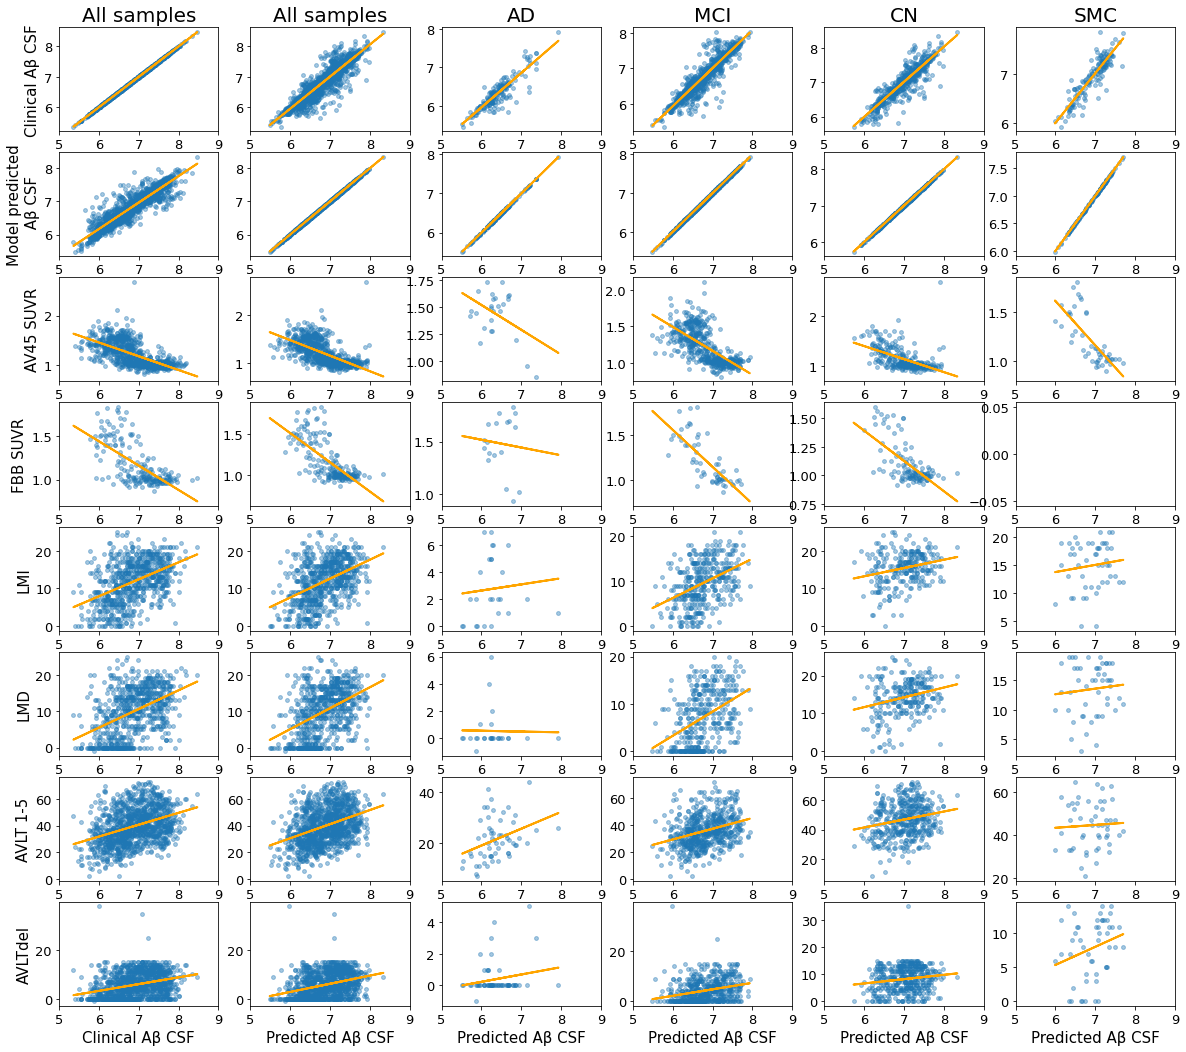

In [25]:
# plot the correlation between selected parameters for all samples and classes separately 
fig, axes = plt.subplots(8,6,figsize = (20,18))

for i in range(0,8):
    axes[i,0].scatter(main_sel['ABETA'],main_sel.iloc[:, [i]].values,alpha=0.4, s = 15) 
    mask =~np.isnan(main_sel.iloc[:, [i]].values.flatten())
    s = stats.linregress(main_sel[mask]['ABETA'],main_sel.iloc[mask, [i]].values.flatten()) 
    axes[i,0].plot(main_sel['ABETA'], s[0]*main_sel['ABETA'] + s[1],linewidth=2, c = 'orange')
    axes[i,0].tick_params(axis='both', which='major', labelsize=13)
    axes[i,0].set_xlim(5,9)
    
for i in range(0,8):
    axes[i,1].scatter(main_sel['prediction'],main_sel.iloc[:, [i]].values,alpha=0.4, s = 15)
    mask =~np.isnan(main_sel.iloc[:, [i]].values.flatten())
    s = stats.linregress(main_sel[mask]['prediction'],main_sel.iloc[mask, [i]].values.flatten()) 
    axes[i,1].plot(main_sel['prediction'], s[0]*main_sel['prediction'] + s[1],linewidth=2, c = 'orange')
    axes[i,1].tick_params(axis='both', which='major', labelsize=13)
    axes[i,1].set_xlim(5,9)
    
for i in range(0,8):
    axes[i,2].scatter(main_sel[main['Research.Group']== 'AD']['prediction'],
                   main_sel[main['Research.Group']== 'AD'].iloc[:, [i]].values,alpha=0.4, s = 15) 
    mask =~np.isnan(main_sel[main['Research.Group']== 'AD'].iloc[:, [i]].values.flatten())
    s = stats.linregress(main_sel[main['Research.Group']== 'AD']['prediction'][mask],main_sel[main['Research.Group']== 'AD'].iloc[mask, [i]].values.flatten()) 
    axes[i,2].plot(main_sel[main['Research.Group']== 'AD']['prediction'], s[0]*
                   main_sel[main['Research.Group']== 'AD']['prediction'] + s[1],linewidth=2, c = 'orange')
    axes[i,2].tick_params(axis='both', which='major', labelsize=13)
    axes[i,2].set_xlim(5,9)
    
for i in range(0,8):
    axes[i,3].scatter(main_sel[main['Research.Group'].isin(['MCI','LMCI','EMCI'])]['prediction'],
                   main_sel[main['Research.Group'].isin(['MCI','LMCI','EMCI'])].iloc[:, [i]].values,alpha=0.4, s = 15) 
    mask =~np.isnan(main_sel[main['Research.Group'].isin(['MCI','LMCI','EMCI'])].iloc[:, [i]].values.flatten())
    s = stats.linregress(main_sel[main['Research.Group'].isin(['MCI','LMCI','EMCI'])]['prediction'][mask],main_sel[main['Research.Group'].isin(['MCI','LMCI','EMCI'])].iloc[mask, [i]].values.flatten()) 
    axes[i,3].plot(main_sel[main['Research.Group'].isin(['MCI','LMCI','EMCI'])]['prediction'], s[0]*
                   main_sel[main['Research.Group'].isin(['MCI','LMCI','EMCI'])]['prediction'] + s[1],
                   linewidth=2, c = 'orange')
    axes[i,3].tick_params(axis='both', which='major', labelsize=13)
    axes[i,3].set_xlim(5,9)
    
for i in range(0,8):
    axes[i,4].scatter(main_sel[main['Research.Group']== 'CN']['prediction'],
                   main_sel[main['Research.Group']== 'CN'].iloc[:, [i]].values,alpha=0.4, s = 15) 
    mask =~np.isnan(main_sel[main['Research.Group']== 'CN'].iloc[:, [i]].values.flatten())
    s = stats.linregress(main_sel[main['Research.Group']== 'CN']['prediction'][mask],main_sel[main['Research.Group']== 'CN'].iloc[mask, [i]].values.flatten()) 
    axes[i,4].plot(main_sel[main['Research.Group']== 'CN']['prediction'], s[0]*
                   main_sel[main['Research.Group']== 'CN']['prediction'] + s[1],linewidth=2, c = 'orange')
    axes[i,4].tick_params(axis='both', which='major', labelsize=13)
    axes[i,4].set_xlim(5,9)
    
for i in range(0,8):
    axes[i,5].scatter(main_sel[main['Research.Group']== 'SMC']['prediction'],
                   main_sel[main['Research.Group']== 'SMC'].iloc[:, [i]].values,alpha=0.4, s = 15) 
    if i != 3:
        mask =~np.isnan(main_sel[main['Research.Group']== 'SMC'].iloc[:, [i]].values.flatten())
        s = stats.linregress(main_sel[main['Research.Group']== 'SMC']['prediction'][mask],main_sel[main['Research.Group']== 'SMC'].iloc[mask, [i]].values.flatten()) 
        axes[i,5].plot(main_sel[main['Research.Group']== 'SMC']['prediction'], s[0]*
                       main_sel[main['Research.Group']== 'SMC']['prediction'] + s[1],linewidth=2, c = 'orange')
    axes[i,5].tick_params(axis='both', which='major', labelsize=13)
    axes[i,5].set_xlim(5,9)
    
axes[0,0].set_ylabel('Clinical Aβ CSF',size = 15)
axes[1,0].set_ylabel('Model predicted\n Aβ CSF',size = 15)
axes[2,0].set_ylabel('AV45 SUVR',size = 15)
axes[3,0].set_ylabel('FBB SUVR',size = 15)
axes[4,0].set_ylabel('LMI',size = 15)
axes[5,0].set_ylabel('LMD',size = 15)
axes[6,0].set_ylabel('AVLT 1-5',size = 15)
axes[7,0].set_ylabel('AVLTdel',size = 15)

axes[7,0].set_xlabel('Clinical Aβ CSF',size = 15)
axes[7,1].set_xlabel('Predicted Aβ CSF',size = 15)
axes[7,2].set_xlabel('Predicted Aβ CSF',size = 15)
axes[7,3].set_xlabel('Predicted Aβ CSF',size = 15)
axes[7,4].set_xlabel('Predicted Aβ CSF',size = 15)
axes[7,5].set_xlabel('Predicted Aβ CSF',size = 15)

axes[0,0].set_title('All samples',size = 20)
axes[0,1].set_title('All samples',size = 20)
axes[0,2].set_title('AD',size = 20)
axes[0,3].set_title('MCI',size = 20)
axes[0,4].set_title('CN',size = 20)
axes[0,5].set_title('SMC',size = 20)

plt.savefig(x+'/correlation_scatterplot_'+x+'.png')
plt.savefig(x+'/correlation_scatterplot_'+x+'.svg', format="svg")

In [26]:
# correlation matrix for all parameters
cor_main = main.corr() #Pearson

In [27]:
cor_main

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,RID,Weight,APOE.A1,APOE.A2,Age,ABETA,...,CLASS,prediction,SUMMARYSUVR_WHOLECEREBNORM_x,WHOLECEREBELLUM_SUVR_x,SUMMARYSUVR_WHOLECEREBNORM_y,WHOLECEREBELLUM_SUVR_y,LIMMTOTAL,AVDEL30MIN,LDELTOTAL,AVTOTSUM
Unnamed: 0.3,1.000000,0.006148,0.006271,0.006389,0.025422,0.016218,-0.007378,-0.007223,-0.007046,0.015461,...,0.000676,0.025540,-0.018721,0.011693,0.016759,0.037788,0.034240,0.014232,0.071596,0.008291
Unnamed: 0.2,0.006148,1.000000,0.999887,0.999692,0.050678,-0.041352,-0.061282,-0.063056,0.003914,0.024460,...,-0.065964,0.019173,-0.126312,-0.021250,0.075495,-0.076641,0.037006,0.072726,0.021121,0.082233
Unnamed: 0.1,0.006271,0.999887,1.000000,0.999941,0.048136,-0.041078,-0.061341,-0.062714,0.003665,0.024963,...,-0.066590,0.019836,-0.126743,-0.020487,0.074164,-0.074008,0.036061,0.071553,0.020056,0.081318
Unnamed: 0,0.006389,0.999692,0.999941,1.000000,0.046218,-0.040893,-0.061252,-0.062345,0.003553,0.025236,...,-0.067004,0.020127,-0.126971,-0.020343,0.073567,-0.071220,0.035151,0.070735,0.019149,0.080540
RID,0.025422,0.050678,0.048136,0.046218,1.000000,-0.116068,0.013426,-0.006865,-0.244297,0.033530,...,-0.060069,0.034844,-0.017015,-0.052343,0.161218,-0.044025,0.135695,0.158462,0.162588,0.183289
Weight,0.016218,-0.041352,-0.041078,-0.040893,-0.116068,1.000000,-0.047937,-0.037193,-0.082684,0.077565,...,-0.078733,0.069001,-0.082486,0.055872,-0.089132,0.109372,0.016476,0.021437,0.009086,0.015570
APOE.A1,-0.007378,-0.061282,-0.061341,-0.061252,0.013426,-0.047937,1.000000,0.353091,-0.076980,-0.336176,...,0.289609,-0.320230,0.277739,-0.044953,0.306105,-0.036712,-0.185282,-0.185838,-0.204820,-0.172965
APOE.A2,-0.007223,-0.063056,-0.062714,-0.062345,-0.006865,-0.037193,0.353091,1.000000,-0.138723,-0.458922,...,0.451895,-0.447503,0.418113,-0.039083,0.545675,-0.026006,-0.273533,-0.159625,-0.284332,-0.164387
Age,-0.007046,0.003914,0.003665,0.003553,-0.244297,-0.082684,-0.076980,-0.138723,1.000000,-0.090926,...,0.147905,-0.103343,0.136415,0.127708,0.192445,0.070867,-0.009969,-0.163979,-0.028801,-0.195207
ABETA,0.015461,0.024460,0.024963,0.025236,0.033530,0.077565,-0.336176,-0.458922,-0.090926,1.000000,...,-0.782128,0.917269,-0.646828,0.091089,-0.658106,0.232306,0.456968,0.319969,0.452289,0.375239


In [28]:
cor_main = cor_main.drop(columns =['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'],
             index = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'])

In [29]:
summary = pd.DataFrame()

In [30]:
# correlation for our model prediction all samples with all parameters
summary['all_pred'] = cor_main['prediction']
# correlation for amyloid CSF all samples with all parameters
summary['all_real'] = cor_main['ABETA']

In [31]:
summary

,all_pred,all_real
Unnamed: 0.3,0.025540,0.015461
Weight,0.069001,0.077565
APOE.A1,-0.320230,-0.336176
APOE.A2,-0.447503,-0.458922
Age,-0.103343,-0.090926
ABETA,0.917269,1.000000
TAU,-0.291454,-0.238923
PTAU,-0.344381,-0.305039
CLASS,-0.759635,-0.782128
prediction,1.000000,0.917269


In [32]:
# correlation for CSF amyloid and model prediction separately for clinical subclasses
m=main[main['Research.Group']=='AD']
cor_m = m.corr()
cor_m= cor_m.drop(columns =['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'],
             index = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'])
summary['AD_pred'] = cor_m['prediction']
summary['AD_real'] = cor_m['ABETA']
print(len(m.index))

m=main[main['Research.Group'].isin(['MCI','LMCI','EMCI'])]
cor_m = m.corr()
cor_m= cor_m.drop(columns =['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'],
             index = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'])
summary['MCI total_pred'] = cor_m['prediction']
summary['MCI total_real'] = cor_m['ABETA']
print(len(m.index))

m=main[main['Research.Group']=='LMCI']
cor_m = m.corr()
cor_m= cor_m.drop(columns =['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'],
             index = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'])
summary['LMCI_pred'] = cor_m['prediction']
summary['LMCI_real'] = cor_m['ABETA']
print(len(m.index))

m=main[main['Research.Group']=='EMCI']
cor_m = m.corr()
cor_m= cor_m.drop(columns =['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'],
             index = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'])
summary['EMCI_pred'] = cor_m['prediction']
summary['EMCI_real'] = cor_m['ABETA']
print(len(m.index))

m=main[main['Research.Group']=='SMC']
cor_m = m.corr()
cor_m= cor_m.drop(columns =['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'],
             index = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'])
summary['SMC_pred'] = cor_m['prediction']
summary['SMC_real'] = cor_m['ABETA']
print(len(m.index))

m=main[main['Research.Group']=='CN']
cor_m = m.corr()
cor_m= cor_m.drop(columns =['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'],
             index = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','RID'])
summary['CN_pred'] = cor_m['prediction']
summary['CN_real'] = cor_m['ABETA']
print(len(m.index))

190
927
259
449
145
606


In [33]:
summary

,all_pred,all_real,AD_pred,AD_real,MCI total_pred,MCI total_real,LMCI_pred,LMCI_real,EMCI_pred,EMCI_real,SMC_pred,SMC_real,CN_pred,CN_real
Unnamed: 0.3,0.025540,0.015461,0.109508,0.044322,0.009417,-0.000222,-0.049644,-0.126088,-0.039537,0.006277,0.044189,0.057733,-0.038451,-0.040191
Weight,0.069001,0.077565,0.069734,0.070763,0.079997,0.087758,0.200496,0.187330,0.008713,0.019157,0.147078,0.130139,0.053253,0.067168
APOE.A1,-0.320230,-0.336176,-0.297082,-0.343744,-0.301675,-0.320445,-0.312533,-0.320402,-0.352252,-0.367433,-0.150540,-0.215331,-0.263683,-0.263135
APOE.A2,-0.447503,-0.458922,-0.330802,-0.309642,-0.458696,-0.472282,-0.490355,-0.527496,-0.392703,-0.403503,-0.407515,-0.469815,-0.305497,-0.315666
Age,-0.103343,-0.090926,0.130818,0.193632,-0.145895,-0.127080,-0.144422,-0.128253,-0.212925,-0.175897,-0.195033,-0.124546,-0.161587,-0.166379
ABETA,0.917269,1.000000,0.885461,1.000000,0.912629,1.000000,0.899632,1.000000,0.923553,1.000000,0.894706,1.000000,0.895415,1.000000
TAU,-0.291454,-0.238923,-0.041729,-0.060669,-0.313568,-0.248494,-0.309801,-0.270803,-0.329214,-0.241881,-0.223073,-0.156167,-0.043280,0.033740
PTAU,-0.344381,-0.305039,-0.080267,-0.094953,-0.369507,-0.313716,-0.306924,-0.278462,-0.413166,-0.342795,-0.355177,-0.310380,-0.157499,-0.114324
CLASS,-0.759635,-0.782128,-0.507746,-0.547973,-0.769271,-0.786380,-0.716403,-0.738592,-0.782470,-0.798139,-0.774556,-0.779363,-0.684473,-0.717087
prediction,1.000000,0.917269,1.000000,0.885461,1.000000,0.912629,1.000000,0.899632,1.000000,0.923553,1.000000,0.894706,1.000000,0.895415


In [34]:
#m = main[['prediction','LDELTOTAL','Research.Group']].dropna()
#stats.pearsonr(m['Research.Group'=='AD']['prediction'],m['LDELTOTAL'])

In [35]:
# preparing correlation matrix plot
summary = summary.rename(index={'SUMMARYSUVR_WHOLECEREBNORM_x': 'SUVR_AV45',
                                'SUMMARYSUVR_WHOLECEREBNORM_y': 'SUVR_FBB'})

In [36]:
summary.loc[['ABETA','SUVR_AV45','SUVR_FBB','LIMMTOTAL','LDELTOTAL','AVTOTSUM','AVDEL30MIN'],
            ['all_pred','all_real','AD_pred','MCI total_pred', 'SMC_pred','CN_pred']]

,all_pred,all_real,AD_pred,MCI total_pred,SMC_pred,CN_pred
ABETA,0.917269,1.000000,0.885461,0.912629,0.894706,0.895415
SUVR_AV45,-0.641438,-0.646828,-0.416576,-0.662034,-0.752773,-0.526451
SUVR_FBB,-0.696302,-0.658106,-0.083046,-0.752304,NaN,-0.634198
LIMMTOTAL,0.440980,0.456968,0.092663,0.425322,0.124451,0.243323
LDELTOTAL,0.439815,0.452289,-0.019950,0.422341,0.090375,0.256962
AVTOTSUM,0.380610,0.375239,0.356054,0.319934,0.051605,0.208301
AVDEL30MIN,0.330109,0.319969,0.195711,0.278002,0.250934,0.155668


In [37]:
vis = summary.loc[['ABETA','SUVR_AV45','SUVR_FBB','LIMMTOTAL','LDELTOTAL','AVTOTSUM','AVDEL30MIN'],
            ['all_pred','all_real','AD_pred','MCI total_pred', 'SMC_pred','CN_pred']]

In [38]:
vis.T

,ABETA,SUVR_AV45,SUVR_FBB,LIMMTOTAL,LDELTOTAL,AVTOTSUM,AVDEL30MIN
all_pred,0.917269,-0.641438,-0.696302,0.440980,0.439815,0.380610,0.330109
all_real,1.000000,-0.646828,-0.658106,0.456968,0.452289,0.375239,0.319969
AD_pred,0.885461,-0.416576,-0.083046,0.092663,-0.019950,0.356054,0.195711
MCI total_pred,0.912629,-0.662034,-0.752304,0.425322,0.422341,0.319934,0.278002
SMC_pred,0.894706,-0.752773,NaN,0.124451,0.090375,0.051605,0.250934
CN_pred,0.895415,-0.526451,-0.634198,0.243323,0.256962,0.208301,0.155668


In [39]:
vis = vis.T.rename(index={'all_pred': 'All samples \npredected Aβ CSF \nmeasures \n(1868)',
                          'all_real': 'All samples \nclinical Aβ \nCSF measures \n(1868)',
                         'AD_pred':'AD predicted \nAβ CSF (190)',
                         'MCI total_pred':'MCI predicted \nAβ CSF (928)',
                         'SMC_pred':'SMC predicted \nAβ CSF (144)',
                         'CN_pred':'CN predicted \nAβ CSF (606)'},
                columns = {'ABETA': 'Clinical Aβ \nCSF measures'})

In [40]:
vis

,Clinical Aβ \nCSF measures,SUVR_AV45,SUVR_FBB,LIMMTOTAL,LDELTOTAL,AVTOTSUM,AVDEL30MIN
All samples \npredected Aβ CSF \nmeasures \n(1868),0.917269,-0.641438,-0.696302,0.440980,0.439815,0.380610,0.330109
All samples \nclinical Aβ \nCSF measures \n(1868),1.000000,-0.646828,-0.658106,0.456968,0.452289,0.375239,0.319969
AD predicted \nAβ CSF (190),0.885461,-0.416576,-0.083046,0.092663,-0.019950,0.356054,0.195711
MCI predicted \nAβ CSF (928),0.912629,-0.662034,-0.752304,0.425322,0.422341,0.319934,0.278002
SMC predicted \nAβ CSF (144),0.894706,-0.752773,NaN,0.124451,0.090375,0.051605,0.250934
CN predicted \nAβ CSF (606),0.895415,-0.526451,-0.634198,0.243323,0.256962,0.208301,0.155668


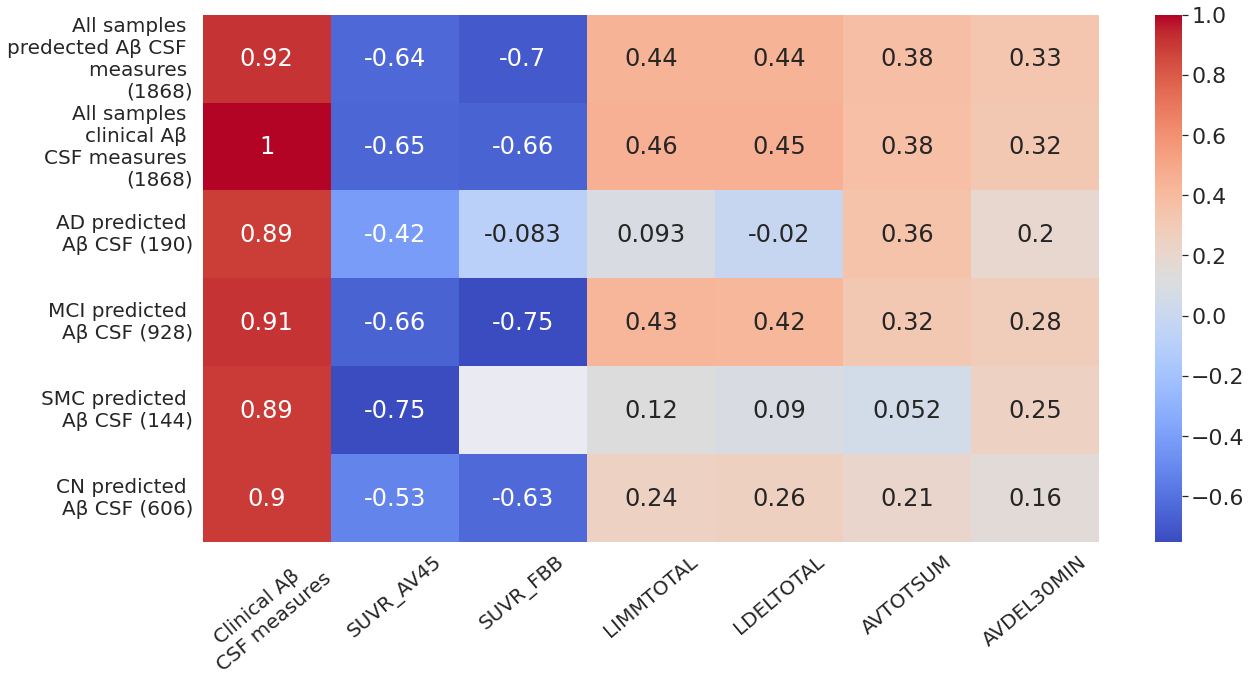

In [41]:
plt.figure(figsize = (19,10))
sns.set(font_scale = 2)

g = sns.heatmap(vis, annot=True, cmap= 'coolwarm')

g.set_xticklabels(vis.columns, rotation=40, size = 20)
g.set_yticklabels(vis.index, rotation=0, size = 20)
plt.tight_layout()
#plt.savefig("corr.png")

plt.savefig("corr.svg", format="svg")


In [42]:

 
print(statistics.stdev([-0.558806,-0.672508]))
print(statistics.mean([-0.558806,-0.672508]))

0.0803994552344728
-0.615657


In [43]:
stats.pearsonr(main['ABETA'],main['prediction'])

(0.9172693504195167, 0.0)

In [44]:
# correlation and p-value for CSF amyloid vs SUVR and memory tests
m = main[['ABETA','SUMMARYSUVR_WHOLECEREBNORM_x']].dropna()
print(stats.pearsonr(m['ABETA'],m['SUMMARYSUVR_WHOLECEREBNORM_x']))

m = main[['ABETA','SUMMARYSUVR_WHOLECEREBNORM_y']].dropna()
print(stats.pearsonr(m['ABETA'],m['SUMMARYSUVR_WHOLECEREBNORM_y']))

m = main[['ABETA','LIMMTOTAL']].dropna()
print(stats.pearsonr(m['ABETA'],m['LIMMTOTAL']))

m = main[['ABETA','LDELTOTAL']].dropna()
print(stats.pearsonr(m['ABETA'],m['LDELTOTAL']))

m = main[['ABETA','AVTOTSUM']].dropna()
print(stats.pearsonr(m['ABETA'],m['AVTOTSUM']))

m = main[['ABETA','AVDEL30MIN']].dropna()
print(stats.pearsonr(m['ABETA'],m['AVDEL30MIN']))

(-0.6468277976683215, 7.552710665437528e-107)
(-0.6581058830270776, 7.977367956793892e-26)
(0.45696765533364747, 7.642774952400727e-39)
(0.4522886612706278, 7.640070400982225e-38)
(0.3752391278234421, 2.1600920425015334e-40)
(0.3199690512862261, 3.8369478361736707e-29)


In [47]:
pval = pd.DataFrame()

In [48]:
# correlation and p-value for all groups
col = ['ABETA','SUMMARYSUVR_WHOLECEREBNORM_x','SUMMARYSUVR_WHOLECEREBNORM_y','LIMMTOTAL','LDELTOTAL',
      'AVTOTSUM','AVDEL30MIN']
for i in range(7):
    m = main[['prediction',col[i],'Research.Group']].dropna()
    print('all', col[i], stats.pearsonr(m['prediction'],m[col[i]]))
    pval['all '+col[i]] = [stats.pearsonr(m['prediction'],m[col[i]])[1]]
    
    if i>0:
        m_cl = main[['ABETA',col[i],'Research.Group']].dropna()
        print('all clinical', col[i], stats.pearsonr(m_cl['ABETA'],m_cl[col[i]]))
        pval['all clinical '+col[i]] = [stats.pearsonr(m_cl['ABETA'],m_cl[col[i]])[1]]
    
    mad = m[m['Research.Group']=='AD']
    print('AD', col[i], stats.pearsonr(mad['prediction'],mad[col[i]]))
    pval['AD '+col[i]] = [stats.pearsonr(mad['prediction'],mad[col[i]])[1]]
    
    mmci = m[m['Research.Group'].isin(['MCI','LMCI','EMCI'])]
    print('MCI total', col[i], stats.pearsonr(mmci['prediction'],mmci[col[i]]))
    pval['MCI total '+col[i]] = [stats.pearsonr(mmci['prediction'],mmci[col[i]])[1]]
    
    mlmci = m[m['Research.Group']=='LMCI']
    if len(mlmci.index)>0:
        print('LMCI', col[i], stats.pearsonr(mlmci['prediction'],mlmci[col[i]]))
    
    memci = m[m['Research.Group']=='EMCI']
    if len(memci.index)>0:
        print('EMCI', col[i], stats.pearsonr(memci['prediction'],memci[col[i]]))
    
    msmc = m[m['Research.Group']=='SMC']
    if len(msmc.index)>0:
        print('SMC', col[i], stats.pearsonr(msmc['prediction'],msmc[col[i]]))
        pval['SMC '+col[i]] = [stats.pearsonr(msmc['prediction'],msmc[col[i]])[1]]
    
    mcn = m[m['Research.Group']=='CN']
    print('CN', col[i], stats.pearsonr(mcn['prediction'],mcn[col[i]]))
    pval['CN '+col[i]] = [stats.pearsonr(mcn['prediction'],mcn[col[i]])[1]]

all ABETA (0.9172693504195167, 0.0)
AD ABETA (0.8854614531315685, 1.766864892053553e-64)
MCI total ABETA (0.9126286595375915, 0.0)
LMCI ABETA (0.8996316556710536, 1.8042366516650276e-94)
EMCI ABETA (0.923552902493749, 3.4623656981835244e-188)
SMC ABETA (0.8947061077477052, 6.563856475920081e-52)
CN ABETA (0.8954146694136912, 2.0225252088537275e-214)
all SUMMARYSUVR_WHOLECEREBNORM_x (-0.6414376744461223, 1.4976265546991075e-104)
all clinical SUMMARYSUVR_WHOLECEREBNORM_x (-0.6468277976683215, 7.552710665437528e-107)
AD SUMMARYSUVR_WHOLECEREBNORM_x (-0.4165760120103372, 0.03426190077005995)
MCI total SUMMARYSUVR_WHOLECEREBNORM_x (-0.6620344961627744, 5.3868491657798085e-65)
LMCI SUMMARYSUVR_WHOLECEREBNORM_x (-0.5343615458289491, 3.6442428999154844e-09)
EMCI SUMMARYSUVR_WHOLECEREBNORM_x (-0.6780057981931367, 1.1760369746743915e-40)
SMC SUMMARYSUVR_WHOLECEREBNORM_x (-0.7527731803765412, 2.8819705286920064e-10)
CN SUMMARYSUVR_WHOLECEREBNORM_x (-0.5264514107085151, 1.4273337801778116e-23)
all

In [49]:
#applying FDR correction on p-value
p = pval.T

In [50]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [51]:
p['qvalue'] = multipletests(p[0], alpha=0.05, method='fdr_bh')[1]

In [52]:
p

,0,qvalue
all ABETA,0.000000e+00,0.000000e+00
AD ABETA,1.766865e-64,1.009637e-63
MCI total ABETA,0.000000e+00,0.000000e+00
SMC ABETA,6.563856e-52,3.281928e-51
CN ABETA,2.022525e-214,2.696700e-213
all SUMMARYSUVR_WHOLECEREBNORM_x,1.497627e-104,1.198101e-103
all clinical SUMMARYSUVR_WHOLECEREBNORM_x,7.552711e-107,7.552711e-106
AD SUMMARYSUVR_WHOLECEREBNORM_x,3.426190e-02,4.282738e-02
MCI total SUMMARYSUVR_WHOLECEREBNORM_x,5.386849e-65,3.591233e-64
SMC SUMMARYSUVR_WHOLECEREBNORM_x,2.881971e-10,4.433801e-10


In [53]:
p<= 0.01

,0,qvalue
all ABETA,True,True
AD ABETA,True,True
MCI total ABETA,True,True
SMC ABETA,True,True
CN ABETA,True,True
all SUMMARYSUVR_WHOLECEREBNORM_x,True,True
all clinical SUMMARYSUVR_WHOLECEREBNORM_x,True,True
AD SUMMARYSUVR_WHOLECEREBNORM_x,False,False
MCI total SUMMARYSUVR_WHOLECEREBNORM_x,True,True
SMC SUMMARYSUVR_WHOLECEREBNORM_x,True,True
